## **Objective**:
Perform an advanced analysis on the Titanic dataset, focusing on feature engineering, predictive modeling, and deriving actionable insights. This project aims to test advanced skills in data preprocessing, feature engineering, model tuning, and interpretation of results.

##**Dataset**:
Use the Titanic dataset. The dataset includes information on passengers such as age, gender, class, and whether they survived.

##**Task Breakdown**
##**Data Exploration and Cleaning**:

1.   Load the dataset.
2.   Perform a comprehensive exploratory data analysis (EDA).
3.   Handle missing values, outliers, and data inconsistencies


## **Feature Engineering**:

1. Create complex features (e.g., family size, title extraction from names).
2. Apply statistical techniques for feature transformation.
3. Perform feature interaction analysis.

## **Predictive Modeling with Advanced Techniques**:

1. Implement and tune advanced machine learning models (e.g., Gradient Boosting, XGBoost).
2. Use cross-validation and hyperparameter tuning for model optimization.
3. Evaluate models using advanced metrics (e.g., ROC AUC, F1 Score).
##**Model Interpretation and Explainability**:

4. Use model interpretability tools (e.g., SHAP) to explain model predictions.
5. Identify and visualize the most important features influencing survival predictions.

##**Model Deployment**:

### **Solution Outline**

#### **Step 1: Data Exploration and Cleaning**

##### **Import important libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Load dataset and display first few rows of teh dataset**

In [ ]:
titanic_set = pd.read_csv("./titanic-training-data.csv")
titanic_set.head(5)

FileNotFoundError: [Errno 2] No such file or directory: './titanic-training-data.csv'

##### **Exploratory Data analysis**

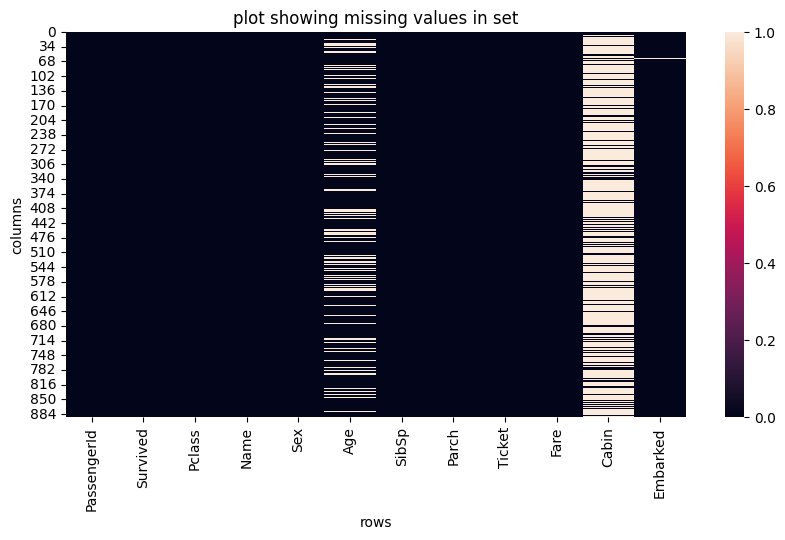

In [ ]:
# check for missig values

missing_attrs = titanic_set.isnull().sum()
plt.figure(figsize=(10, 5))

sns.heatmap(titanic_set.isnull())
plt.title("plot showing missing values in set")
plt.xlabel("rows")
plt.ylabel("columns")
plt.show()

In [ ]:
subset = titanic_set.dropna(subset=["Age", "Cabin"])

In [ ]:
age_corr = subset["Age"].corr(subset["Survived"])
print("correlation between age and survival: ", age_corr)

NameError: name 'subset' is not defined

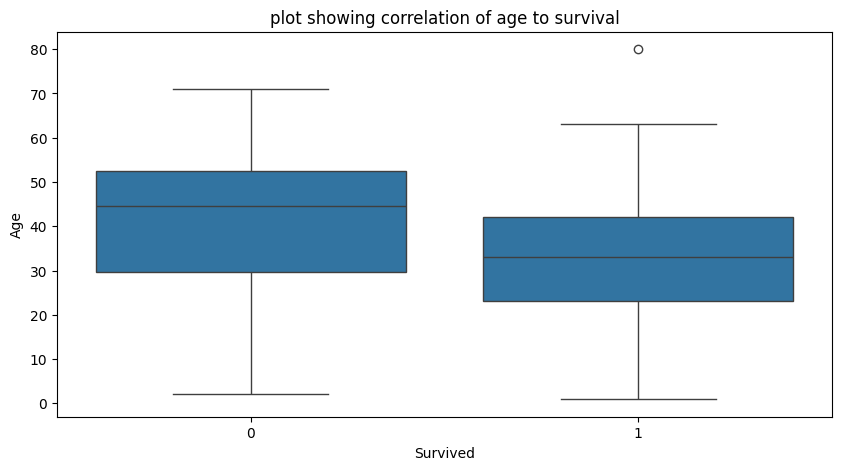

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(x="Survived", y="Age", data=subset)
plt.title("plot showing correlation of age to survival")
# plt.xlabel("rows")
# plt.ylabel("columns")
plt.show()

In [ ]:
titanic_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **Handling Missing values and dropping non-useful columns**

In [ ]:
relevant = titanic_set.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])

In [ ]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
age_mode = relevant["Age"].mode()[0]
embarked_mode = relevant["Embarked"].mode()[0]

In [ ]:
relevant["Age"].fillna(value=age_mode, inplace=True)
relevant["Embarked"].fillna(value=embarked_mode, inplace=True)

In [ ]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
relevant["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

#### **Step 2: Feature Engineering**

#####**Encode sex, Male =1, Female =0**

In [ ]:
relevant["Sex"] = relevant["Sex"].map({"male": 1, "female": 0})

In [ ]:
relevant["Sex"].unique()

array([1, 0])

#####**Encode Embarked**

##### **OneHotEncoding of Embarked**

In [ ]:
relevant["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# relevant["Embarked"] = relevant["Embarked"].map({"S": 1, "C": 0})
embark_encoded = pd.get_dummies(relevant["Embarked"], prefix="Embarked")
relevant = pd.concat([relevant, embark_encoded], axis=1)
relevant.drop("Embarked", axis=1, inplace=True)

In [ ]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


##### **Drop non used columns and merge data**

##### **EDA pairplot**

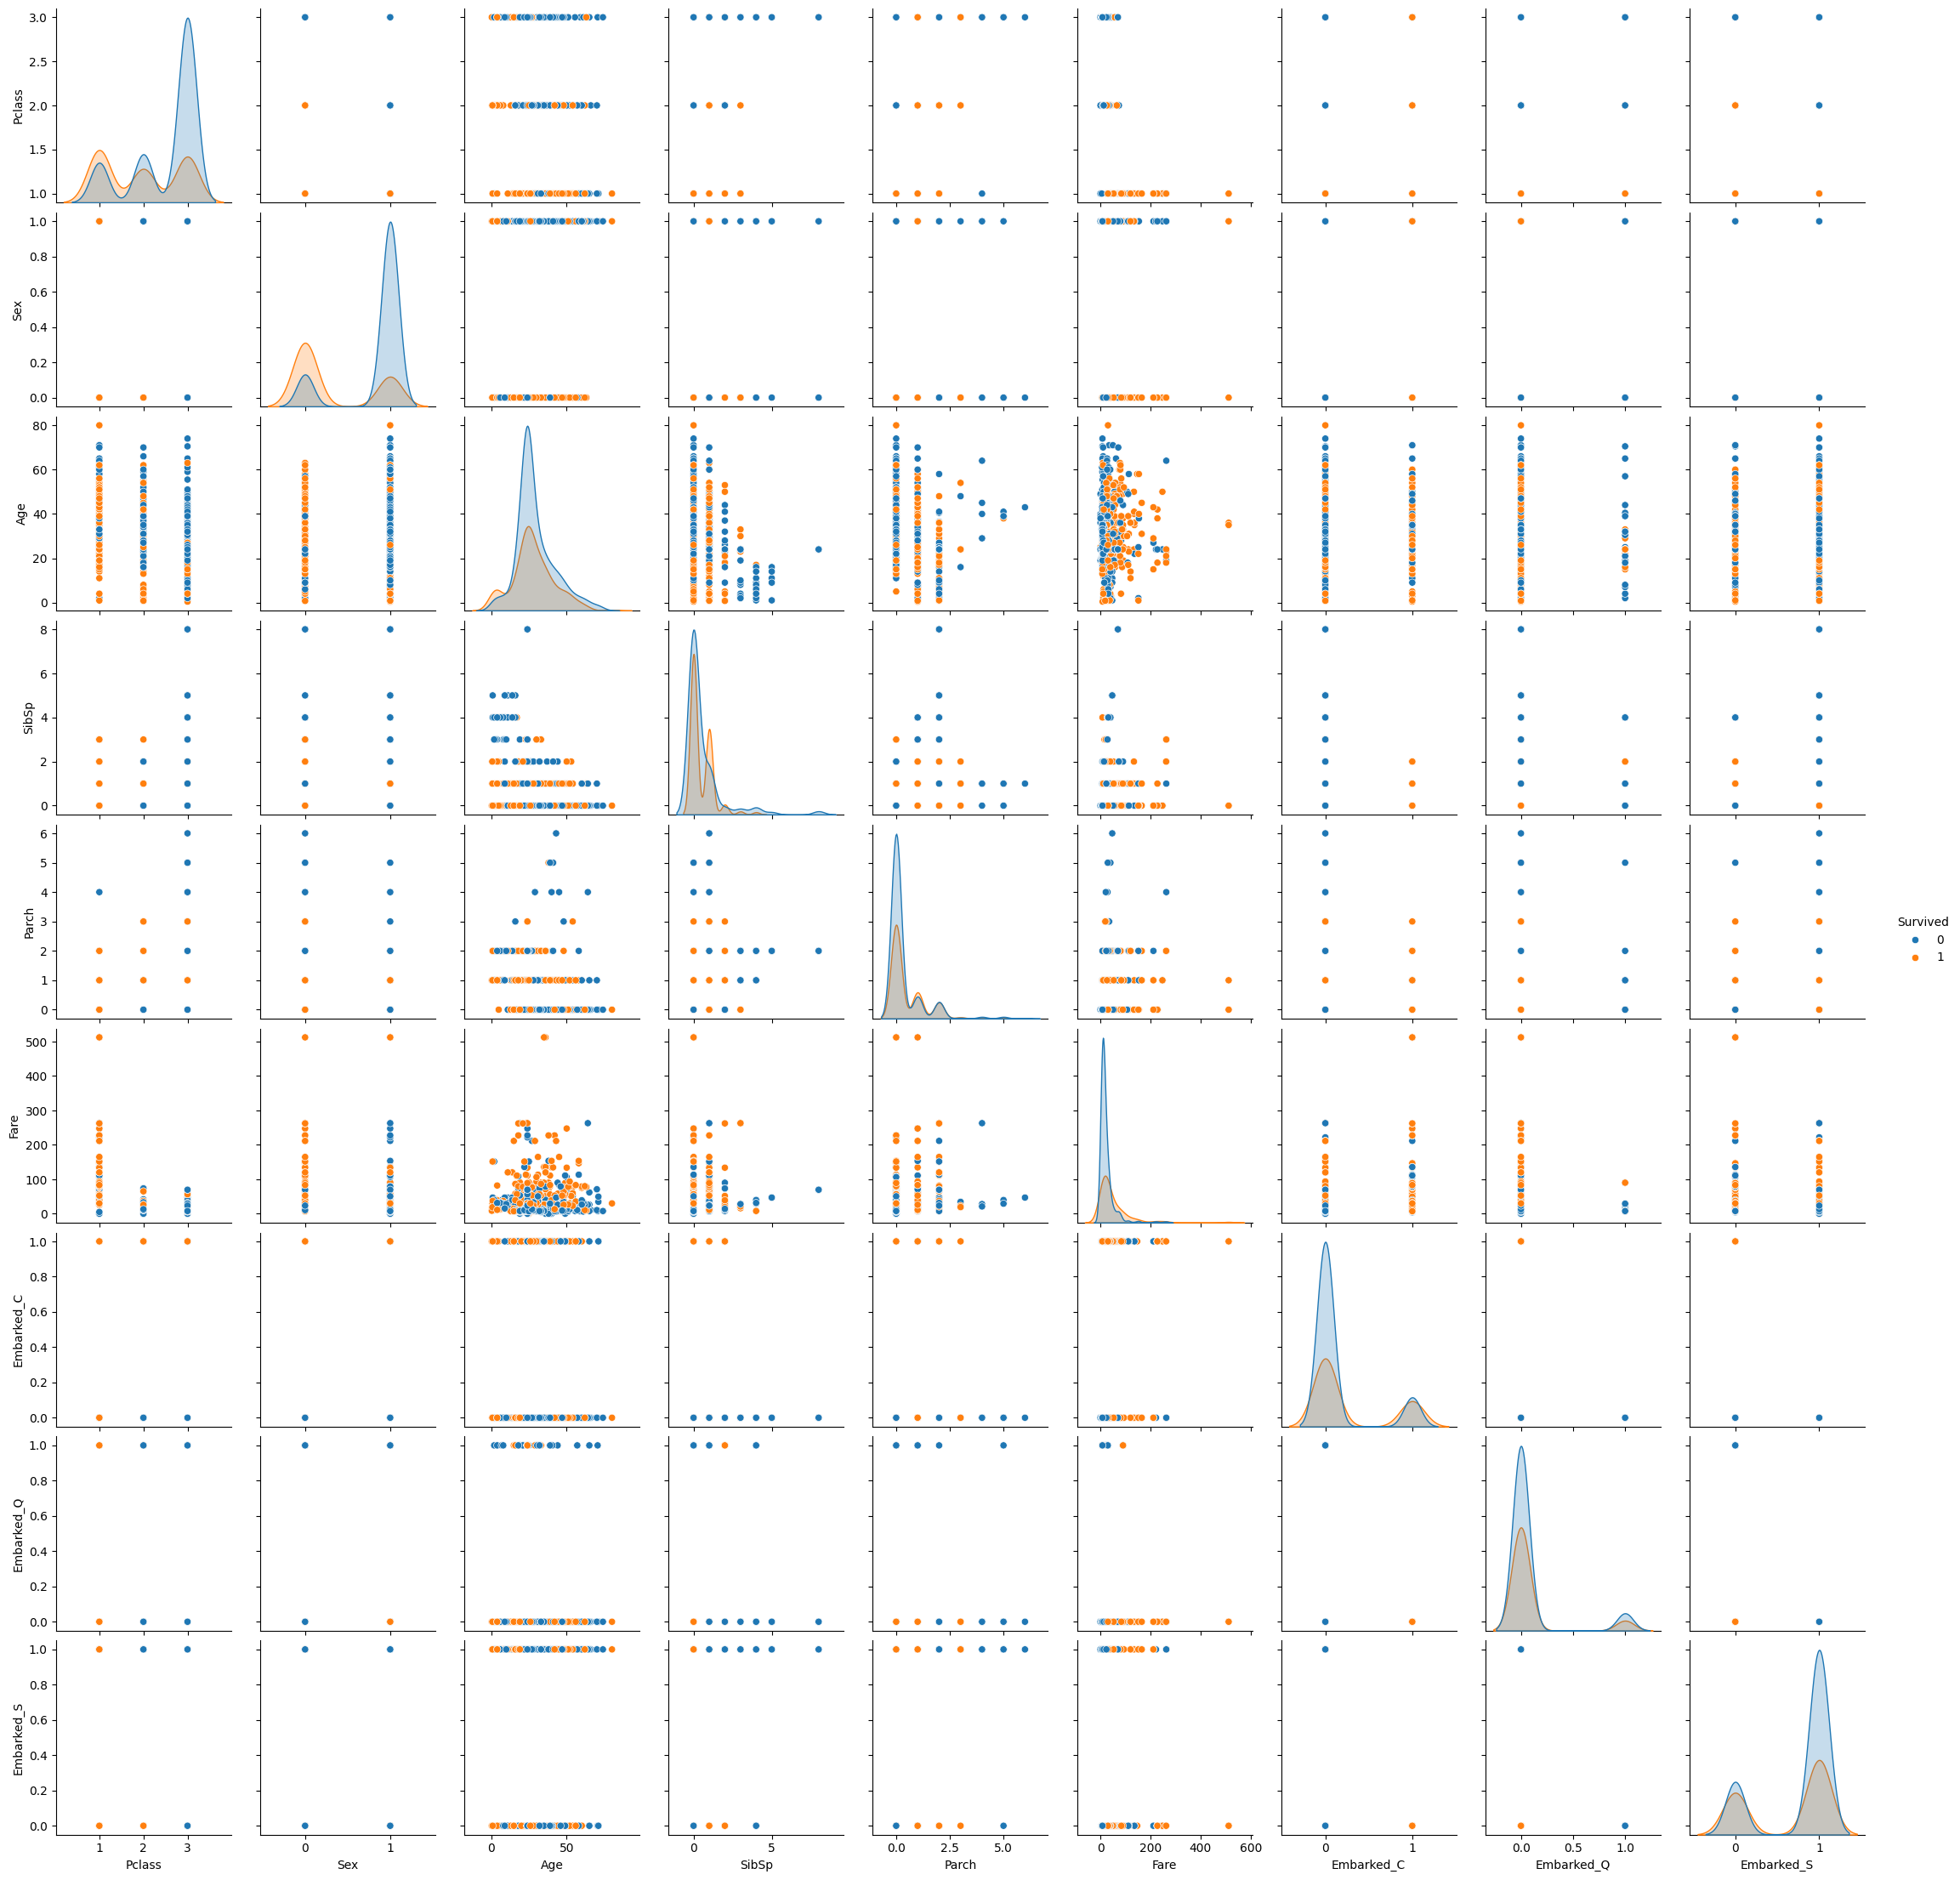

In [ ]:
sns.pairplot(relevant, hue='Survived')

##### **Heatmap for correlation matrix**

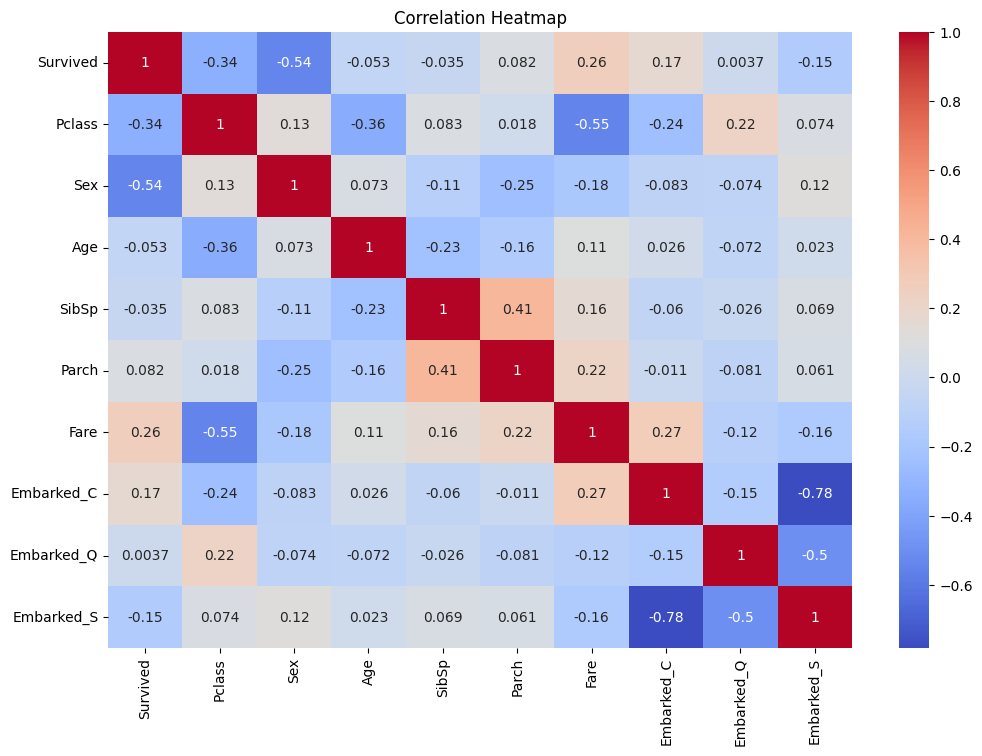

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(relevant.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


####  **Step 3:Predictive modeling**

##### **Create up to three differente models and use Use Voting Method to get the final ensemble model**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, classification_report


X = relevant.drop(columns=['Survived'])
y = relevant['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting model
gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(gb, gb_params, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)

# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)

# Ensemble model
voting_clf = VotingClassifier(estimators=[
    ('gb', grid_gb.best_estimator_),
    ('xgb', grid_xgb.best_estimator_),
], voting='soft')
voting_clf.fit(X_train, y_train)

# Predict and evaluate models
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

print(f'Ensemble Model ROC AUC: {roc_auc_score(y_test, y_prob)}')
print(f'Ensemble Model Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Ensemble Model F1 Score: {f1_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Ensemble Model ROC AUC: 0.8844916344916345
Ensemble Model Accuracy: 0.7988826815642458
Ensemble Model F1 Score: 0.7352941176470588
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



####  **Step 4:Model Interpretation using shap**

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,1,1,45.5,0,0,28.5000,False,False,True
733,2,1,23.0,0,0,13.0000,False,False,True
382,3,1,32.0,0,0,7.9250,False,False,True
704,3,1,26.0,1,0,7.8542,False,False,True
813,3,0,6.0,4,2,31.2750,False,False,True
...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,False,False,True
270,1,1,24.0,0,0,31.0000,False,False,True
860,3,1,41.0,2,0,14.1083,False,False,True
435,1,0,14.0,1,2,120.0000,False,False,True


##### **Save Model** [Here](https://)

In [ ]:
import pickle

with open('classifier.pkl', 'wb') as file:
  pickle.dump(voting_clf, file)


1.   ##### ***Define a single /predict endpoint that takes JSON input, uses a pre-trained model to make predictions, and returns the predictions as a JSON response.***
2. ##### ***Set up the environment for running the Flask application in a Docker container by using a Python base image, copying the application files, installing dependencies, and defining the command to start the app.***

Serve model as REST API using FastAPI web framework